In [4]:
from pandas import read_csv

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

boston_pd = read_csv('/home/addinedu/dev_ws/data/machine/housing.csv', header=None, delimiter='\s+', names=column_names)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
import plotly.express as px

fig = px.histogram(boston_pd, x='PRICE')
fig.show()

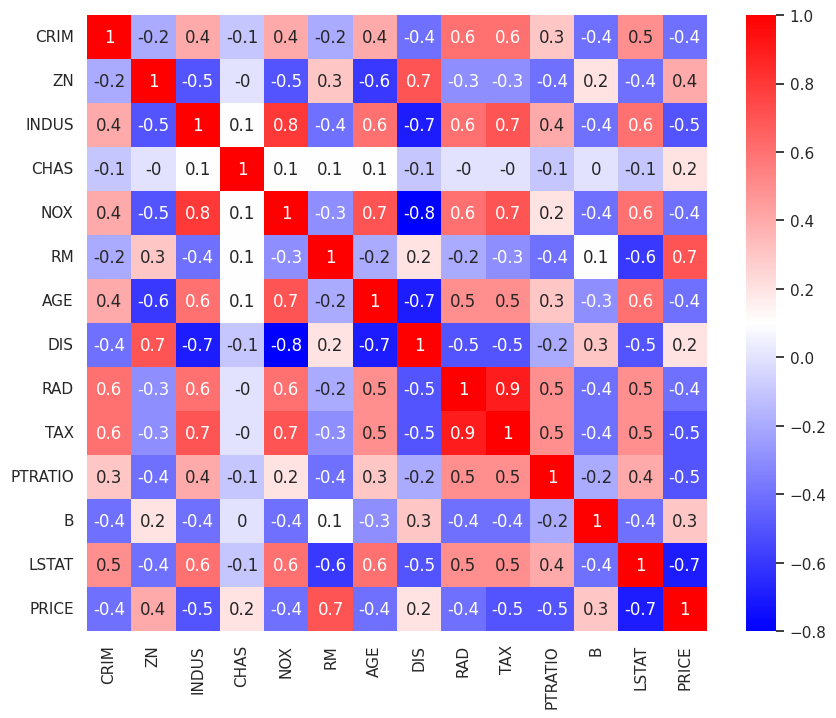

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = boston_pd.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

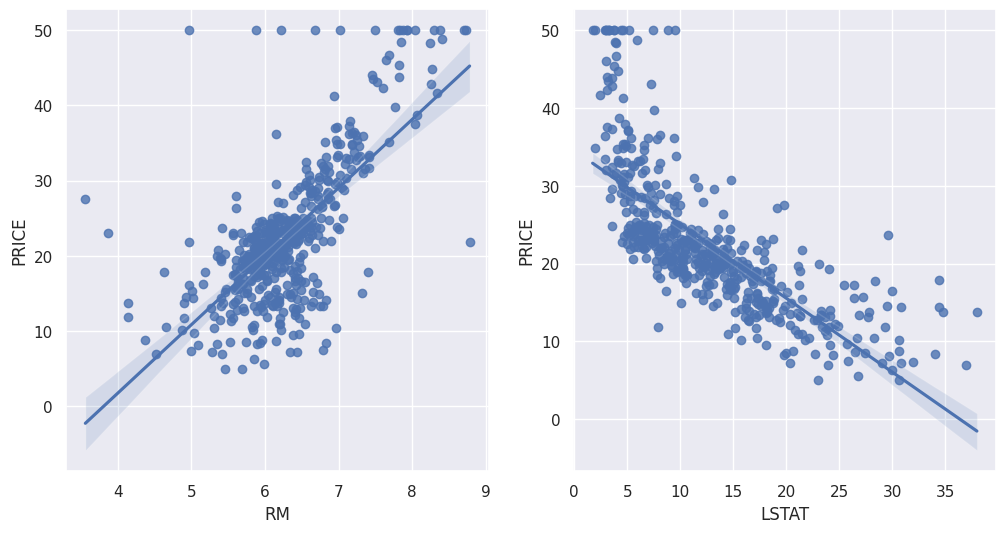

In [9]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols =2 )
sns.regplot(x='RM', y='PRICE', data = boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data = boston_pd, ax=ax[1]);

In [15]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

102

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('MSE of Train data : ', rmse_tr)
print('MSE of Test data : ', rmse_test)

MSE of Train data :  4.642806069019823
MSE of Test data :  4.931352584146701


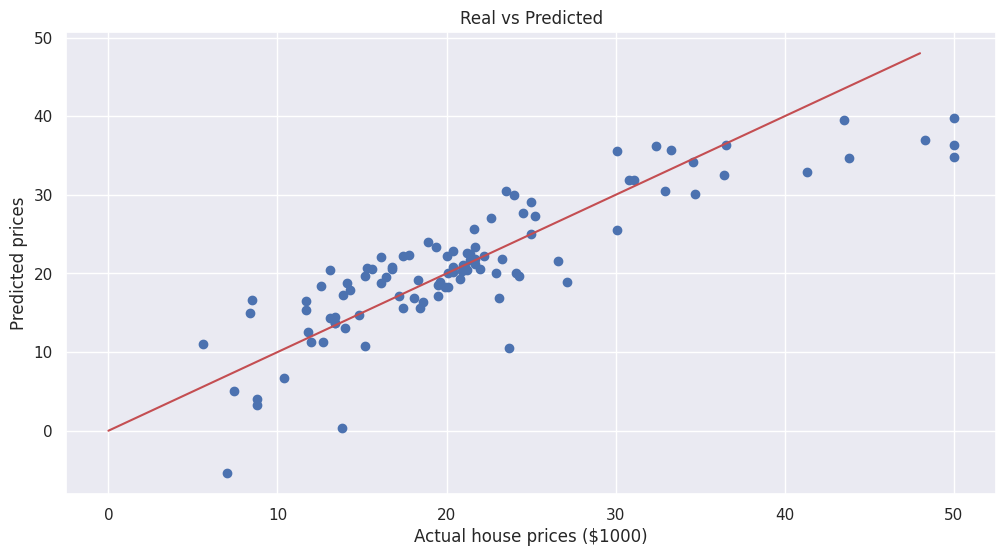

In [18]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual house prices ($1000)")
plt.ylabel("Predicted prices")
plt.title('Real vs Predicted')
plt.plot([0,48], [0,48], 'r')
plt.show()